In [2]:
from IPython import display
display.clear_output()

In [4]:
# Check the YOLO environment
import ultralytics
ultralytics.checks()

Ultralytics 8.3.134 🚀 Python-3.12.3 torch-2.7.0+cu126 CPU (Intel Core(TM) i5-10400F 2.90GHz)
Setup complete ✅ (12 CPUs, 15.5 GB RAM, 600.0/994.8 GB disk)


In [5]:
# Import YOLOv8
from ultralytics import YOLO
from IPython.display import display, Image

In [6]:
# Set up and configure the YOLO model
# Load the best model checkpoint from the previous training
# Make sure to replace 'best.pt' with the actual path to your best model checkpoint
model = YOLO("yolov8s.pt")

# Set image size to 640 for optimal YOLOv8 compatibility
img_size = 640

In [11]:
model.train(
    data="unocards_dataset/data.yaml",
    epochs=50,               # 50-100 is often sufficient unless you have a large dataset
    imgsz=640,               # Standard YOLO image size; you can increase for higher resolution
    batch=16,                # Use the largest that fits your GPU; adjust for CPU training
    workers=2,               # Lower if using CPU; higher if you have more CPU cores
    lr0=0.001,               # Initial learning rate
    lrf=0.01,                # Final learning rate fraction
    warmup_epochs=3,         # Gradually ramp up learning
    warmup_momentum=0.8,     # Helps stabilize early training
    box=0.05,                # Box loss gain
    cls=0.5,                 # Class loss gain
    mosaic=1.0,              # Data augmentation; turn off if dataset is small or synthetic
    mixup=0.0,               # Disable unless you have a massive dataset
    hsv_h=0.015,             # Hue variation
    hsv_s=0.7,               # Saturation variation
    hsv_v=0.4,               # Value variation
    perspective=0.0005,      # Perspective warping
    flipud=0.0,              # Vertical flip (not recommended for cards)
    fliplr=0.5,              # Horizontal flip (good for cards)
    copy_paste=0.0,          # Disable unless useful for synthetic data

    augment=True,
    plots=True,
    device='cpu',
    project="uno_train_final"
)


Ultralytics 8.3.134 🚀 Python-3.12.3 torch-2.7.0+cu126 CPU (Intel Core(TM) i5-10400F 2.90GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=16, bgr=0.0, box=0.05, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=unocards_dataset/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train5, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0005, plots=True, pose=12.0

train: Scanning /home/damjep/Desktop/yang-penting-2/unocards_dataset/labels/train.cache... 87 images, 0 backgrounds, 0 corrupt: 100%|██████████| 87/87 [00:00<?, ?it/s]

val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2900.5±527.9 MB/s, size: 52.3 KB)



/home/damjep/Desktop/yang-penting-2/.venv/lib/python3.12/site-packages/torch/utils/data/dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
val: Scanning /home/damjep/Desktop/yang-penting-2/unocards_dataset/labels/val.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]

Plotting labels to uno_train_final/train5/labels.jpg... 



/home/damjep/Desktop/yang-penting-2/.venv/lib/python3.12/site-packages/torch/utils/data/dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000179, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to uno_train_final/train5
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G    0.01551      5.444      2.226         19        640: 100%|██████████| 6/6 [00:45<00:00,  7.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.43s/it]

                   all         10         10    0.00129      0.286     0.0207     0.0125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50         0G    0.01348      5.261       2.08         12        640: 100%|██████████| 6/6 [00:44<00:00,  7.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.38s/it]

                   all         10         10    0.00289      0.286      0.048     0.0383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50         0G    0.01267      5.218      1.896         10        640: 100%|██████████| 6/6 [00:43<00:00,  7.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.34s/it]

                   all         10         10      0.021      0.286     0.0558     0.0386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50         0G    0.01153      5.185      1.769         15        640: 100%|██████████| 6/6 [00:43<00:00,  7.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.29s/it]

                   all         10         10       0.16      0.333      0.273       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50         0G    0.01057      5.059      1.659         13        640: 100%|██████████| 6/6 [00:44<00:00,  7.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.37s/it]

                   all         10         10      0.163      0.333      0.308      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50         0G   0.008963      4.836      1.499         19        640: 100%|██████████| 6/6 [00:44<00:00,  7.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.33s/it]

                   all         10         10      0.165      0.333      0.285      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50         0G   0.009347      4.747      1.435         16        640: 100%|██████████| 6/6 [00:43<00:00,  7.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.33s/it]

                   all         10         10     0.0232      0.286       0.19      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50         0G   0.008542      4.643      1.346         11        640: 100%|██████████| 6/6 [00:43<00:00,  7.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.39s/it]

                   all         10         10     0.0208      0.286       0.19      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50         0G   0.007671      4.542       1.25         21        640: 100%|██████████| 6/6 [00:43<00:00,  7.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.36s/it]

                   all         10         10     0.0341      0.429      0.204      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50         0G   0.007636      4.505       1.23         12        640: 100%|██████████| 6/6 [00:44<00:00,  7.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.34s/it]

                   all         10         10      0.105      0.571      0.314      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50         0G   0.007606      4.307      1.254         14        640: 100%|██████████| 6/6 [00:44<00:00,  7.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.42s/it]

                   all         10         10     0.0995      0.714      0.348       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50         0G   0.007345      4.257      1.213         17        640: 100%|██████████| 6/6 [00:44<00:00,  7.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.37s/it]

                   all         10         10      0.161      0.762      0.486      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50         0G   0.007559      4.166        1.2         10        640: 100%|██████████| 6/6 [00:43<00:00,  7.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.35s/it]

                   all         10         10      0.174       0.81       0.64      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50         0G   0.007816      4.167      1.225         17        640: 100%|██████████| 6/6 [00:44<00:00,  7.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.48s/it]

                   all         10         10      0.191          1      0.768      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50         0G   0.006434      3.865      1.142         15        640: 100%|██████████| 6/6 [00:43<00:00,  7.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.29s/it]

                   all         10         10      0.194          1      0.768      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50         0G    0.00722      3.907      1.203         17        640: 100%|██████████| 6/6 [00:42<00:00,  7.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.30s/it]

                   all         10         10      0.173          1       0.87      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50         0G   0.006737      3.694      1.162         16        640: 100%|██████████| 6/6 [00:42<00:00,  7.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.31s/it]

                   all         10         10       0.16          1      0.846      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50         0G   0.006763      3.725      1.145         14        640: 100%|██████████| 6/6 [00:42<00:00,  7.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.28s/it]

                   all         10         10      0.157          1      0.858      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50         0G   0.006541      3.465      1.145         13        640: 100%|██████████| 6/6 [00:42<00:00,  7.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.32s/it]

                   all         10         10      0.154          1      0.834      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50         0G   0.006546      3.533      1.157         29        640:  67%|██████▋   | 4/6 [00:32<00:16,  8.09s/it]


KeyboardInterrupt: 

In [9]:
# Additional Performance Monitoring
# Validate the model and display metrics
model.val(data="unocards_dataset/data.yaml")

Ultralytics 8.3.134 🚀 Python-3.12.3 torch-2.7.0+cu126 CPU (Intel Core(TM) i5-10400F 2.90GHz)


Model summary (fused): 72 layers, 11,145,708 parameters, 0 gradients, 28.5 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2419.0±333.7 MB/s, size: 51.5 KB)


val: Scanning /home/damjep/Desktop/yang-penting-2/unocards_dataset/labels/val.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]
/home/damjep/Desktop/yang-penting-2/.venv/lib/python3.12/site-packages/torch/utils/data/dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.48s/it]


                   all         10         10      0.978      0.143       0.28      0.236
                 red-0          1          1      0.848          1      0.995      0.796
               green-0          3          3          1          0      0.376      0.339
                blue-0          2          2          1          0      0.144      0.134
                 red-1          1          1          1          0          0          0
              yellow-1          1          1          1          0          0          0
              yellow-2          1          1          1          0      0.111     0.0829
                blue-2          1          1          1          0      0.332      0.298
Speed: 0.9ms preprocess, 247.6ms inference, 0.0ms loss, 191.8ms postprocess per image
Results saved to uno_train2/train52


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 1,  2,  3,  6,  7,  8, 10])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7914387dd1c0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047

In [ ]:
# Predict on test set with custom confidence level and save images for inspection
model.predict(
    source="unocards_dataset/images/test",
    conf=0.25,
    save=True
)


image 1/85 /content/UNO-DATASET--3/test/images/IMG_1849_jpg.rf.6d8d037e9aa0517f5e31b2b64c764e57.jpg: 640x640 2 lcolor-40s, 90.8ms
image 2/85 /content/UNO-DATASET--3/test/images/IMG_1854_jpg.rf.493b57cdbcf695995193957d94ef25f0.jpg: 640x640 2 lcolor-40s, 50.0ms
image 3/85 /content/UNO-DATASET--3/test/images/IMG_1870_jpg.rf.b8a694202d7032260a79c17277b7b653.jpg: 640x640 2 lcolor-400s, 46.3ms
image 4/85 /content/UNO-DATASET--3/test/images/IMG_1871_jpg.rf.d1e603462e76998af467639d5cb82c43.jpg: 640x640 1 lcolor-400, 45.8ms
image 5/85 /content/UNO-DATASET--3/test/images/IMG_1876_jpg.rf.3dfce518b8546e412e38e94d299046f6.jpg: 640x640 1 lcolor-40, 33.4ms
image 6/85 /content/UNO-DATASET--3/test/images/IMG_1882_jpg.rf.88791315216b9cfa7181dd7846aa2a96.jpg: 640x640 2 lcolor-40s, 33.5ms
image 7/85 /content/UNO-DATASET--3/test/images/IMG_1906_jpg.rf.8cbed8a1976609290a11d4d076e3ba5b.jpg: 640x640 1 lcolor-400, 34.7ms
image 8/85 /content/UNO-DATASET--3/test/images/IMG_1916_jpg.rf.3e1d135ae1c86730025e05bd54

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'lblue-0', 1: 'lblue-1', 2: 'lblue-2', 3: 'lblue-20', 4: 'lblue-3', 5: 'lblue-4', 6: 'lblue-5', 7: 'lblue-6', 8: 'lblue-7', 9: 'lblue-8', 10: 'lblue-9', 11: 'lbluerevers-20', 12: 'lblueskip-20', 13: 'lcolor-40', 14: 'lcolor-400', 15: 'lgreen-0', 16: 'lgreen-1', 17: 'lgreen-2', 18: 'lgreen-20', 19: 'lgreen-3', 20: 'lgreen-4', 21: 'lgreen-5', 22: 'lgreen-6', 23: 'lgreen-7', 24: 'lgreen-8', 25: 'lgreen-9', 26: 'lgreenrevers-20', 27: 'lgreenskip-20', 28: 'lred-0', 29: 'lred-1', 30: 'lred-2', 31: 'lred-20', 32: 'lred-3', 33: 'lred-4', 34: 'lred-5', 35: 'lred-6', 36: 'lred-7', 37: 'lred-8', 38: 'lred-9', 39: 'lredrevers-20', 40: 'lredskip-20', 41: 'lyellow-0', 42: 'lyellow-1', 43: 'lyellow-2', 44: 'lyellow-20', 45: 'lyellow-3', 46: 'lyellow-4', 47: 'lyellow-5', 48: 'lyellow-6', 49: 'lyellow-7', 50: 'lyellow-8', 51: 'lyellow-9', 52: 'lyellowre

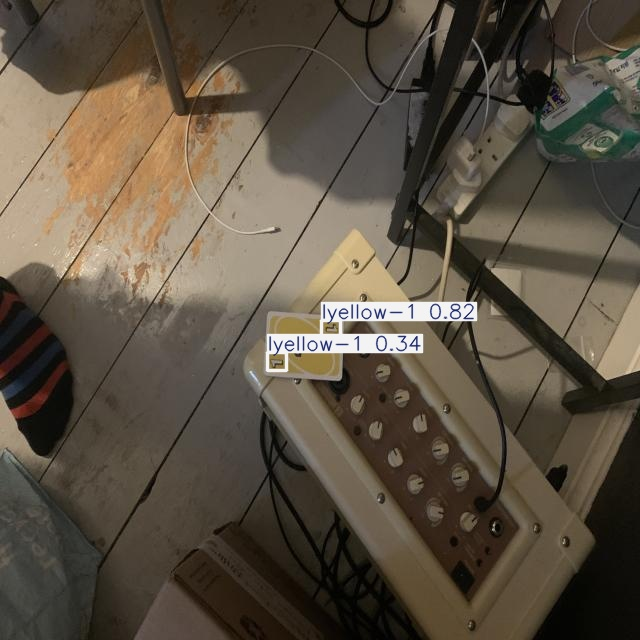

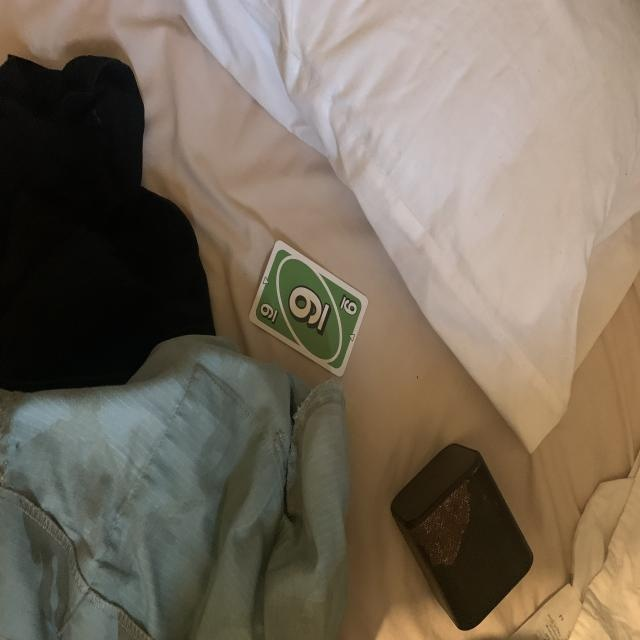

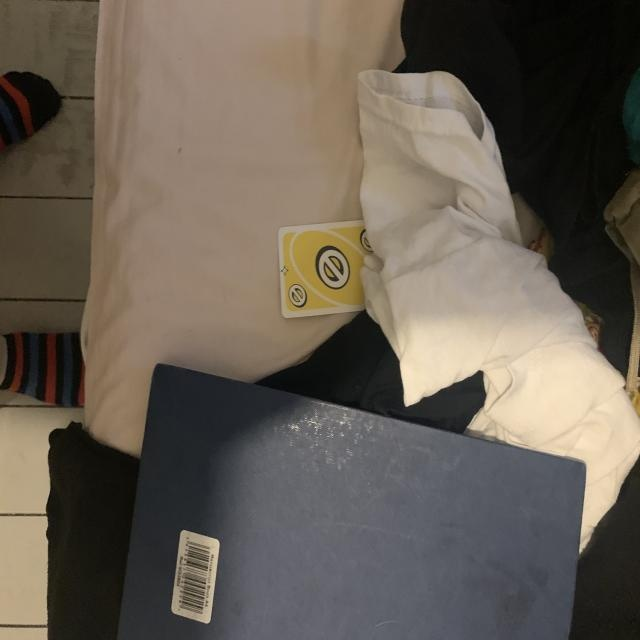

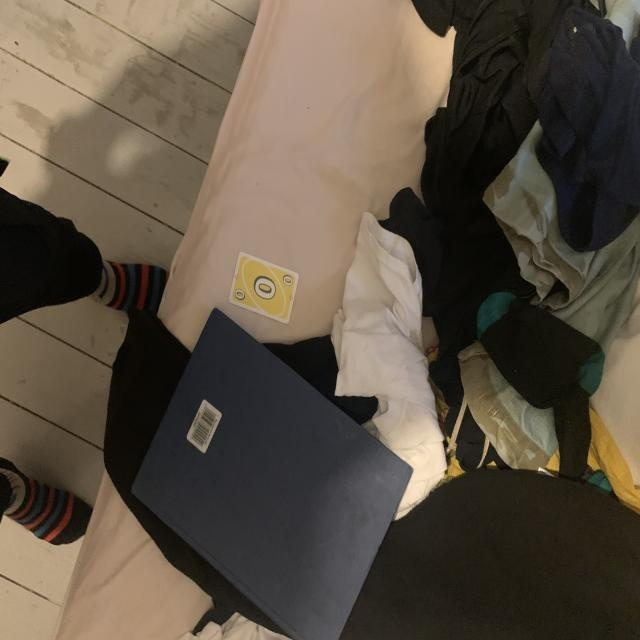

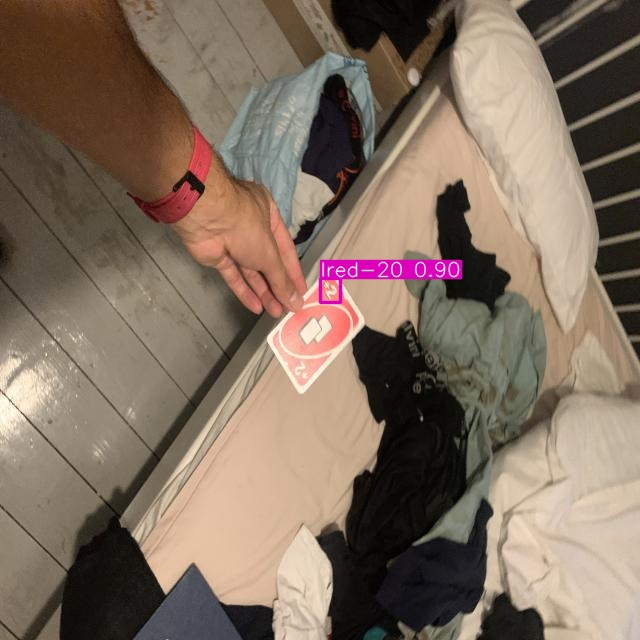

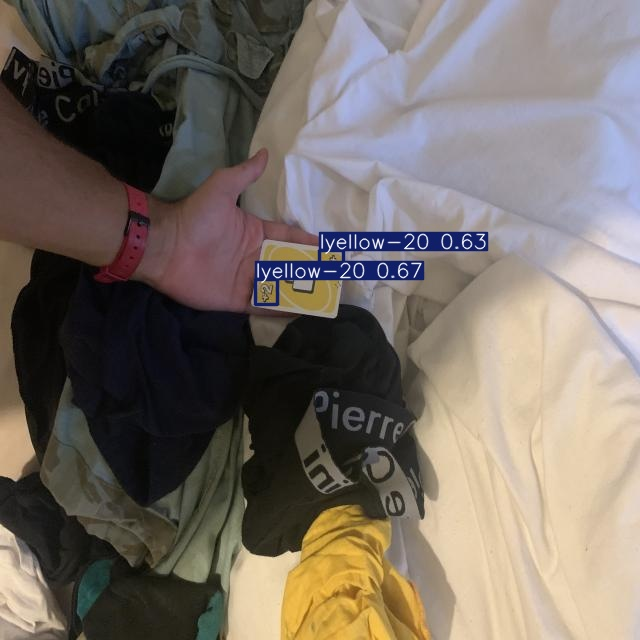

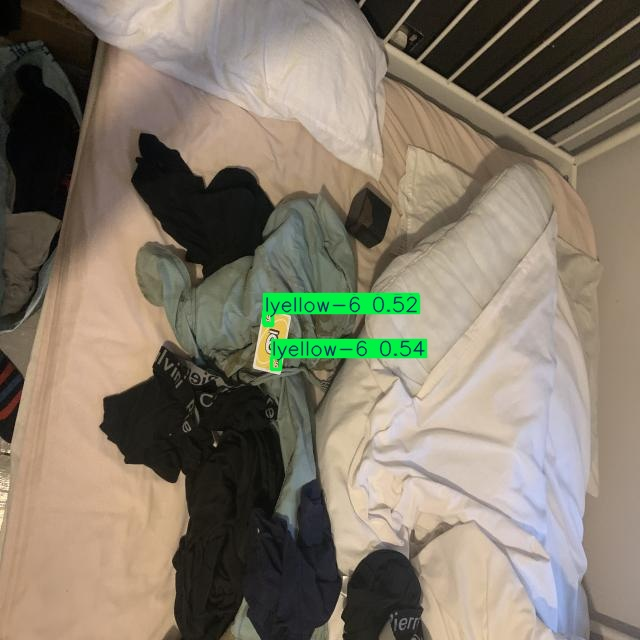

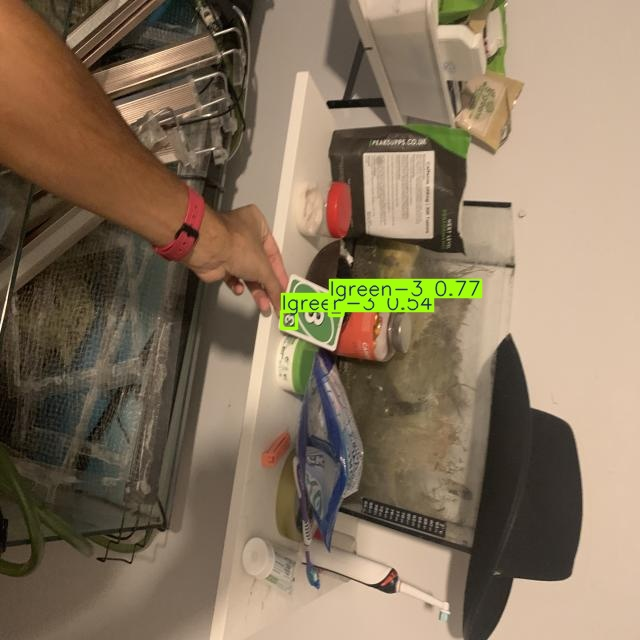

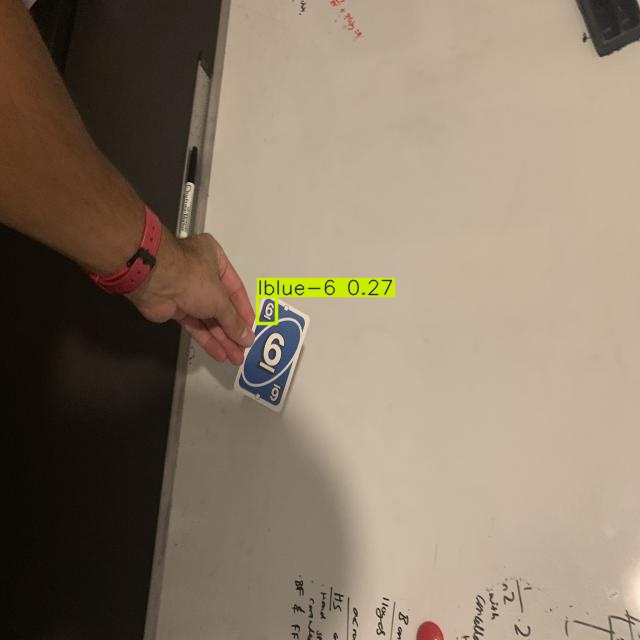

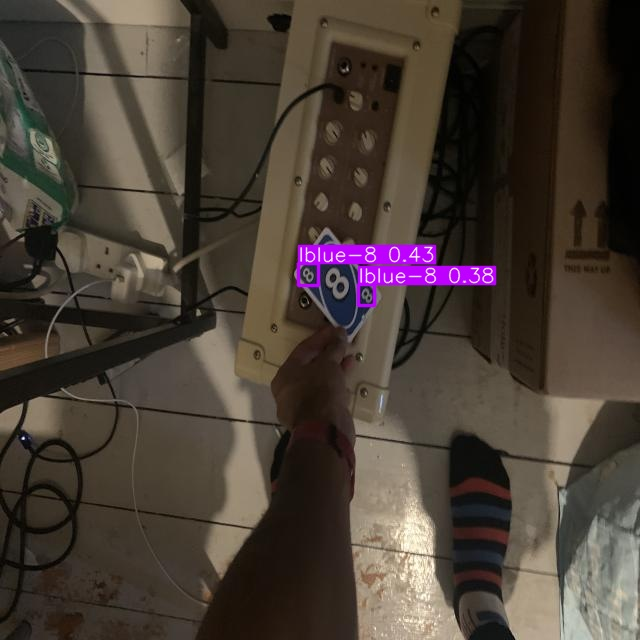

In [16]:
# Display sample predictions
import glob
from IPython.display import Image, display
for image_path in glob.glob('/content/UNO_Card_Detection_YOLOv8/train24/*.jpg')[:10]:
    display(Image(filename=image_path, width=400))
    print("\n")


In [22]:
import shutil
import os

# Define source and destination paths
source_folder = "/content/UNO_Card_Detection_YOLOv8"
destination_folder = "/content/drive/MyDrive/UNO_Card_Detection_YOLOv8"

# Ensure destination folder exists
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

# Copy files and subfolders manually
for root, dirs, files in os.walk(source_folder):
    # Construct the corresponding path in the destination
    dest_dir = root.replace(source_folder, destination_folder, 1)
    if not os.path.exists(dest_dir):
        os.makedirs(dest_dir)
    for file in files:
        # Copy each file to the destination folder
        shutil.copy2(os.path.join(root, file), os.path.join(dest_dir, file))

print("All files and subfolders have been copied successfully!")

All files and subfolders have been copied successfully!
